Assignment 2

Name: MD Ismail Bhuiyan
ID: 2021-2-60-063

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

# Set random seed for reproducibility
np.random.seed(42)

# Function to generate mock data for tasks and robots
def generate_mock_data(num_tasks=10, num_robots=5):
    task_durations = np.random.randint(1, 11, size=num_tasks)  # Random task durations between 1 and 10 hours
    task_priorities = np.random.randint(1, 6, size=num_tasks)  # Random task priorities between 1 and 5
    robot_efficiencies = np.random.uniform(0.5, 1.5, size=num_robots)  # Random robot efficiencies between 0.5 and 1.5
    return task_durations, task_priorities, robot_efficiencies

In [ ]:

# GA algorithm placeholder for students to implement their solution
def run_genetic_algorithm(task_durations, task_priorities, robot_efficiencies):

    population_size = 50
    n_generations = 100

    # Placeholder for the initial population generation

    population = [np.random.randint(0, len(robot_efficiencies), size=len(task_durations)) for _ in range(population_size)]
    best_solution=None
    best_fitness=float('inf')

    for generation_no in range(n_generations):

        # Placeholder for the fitness function calculation
        def fitness(sol):
            Tr=np.array([ 0 for _ in range(len(robot_efficiencies))]) #Time spend
            for i in range(len(sol)):
                Tr[sol[i]]+=task_durations[i]*task_priorities[i]/robot_efficiencies[sol[i]]

            Ttotal=Tr.max()  # Total Production Time (Ttotal)
            B=np.std(Tr)  # Workload Balance (B)
            F=Ttotal+B # Fitness F
            return F

        # Tournament Selection Function
        def tournament_selection(k):
            tournament_subset=np.random.choice(population_size, size=k,replace=False) #selected subset from population
            subset_fitness=np.array([fitness(population[x]) for x in tournament_subset])
            winner=np.argmin(subset_fitness) # argmin returns index of min value
            return population[tournament_subset[winner]]

        offsprings=[]
        for _ in range(int(population_size/2)):

            # Placeholder for the selection process (Tournament Selection)
            tournament_size=int((10/100)*population_size) # 10%
            parent1=tournament_selection(tournament_size)
            parent2=tournament_selection(tournament_size)

            # Placeholder for the crossover operation
            crossover_point=np.random.randint(0,len(task_durations))
            new_offspring=np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
            offsprings.append(new_offspring)
            new_offspring=np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
            offsprings.append(new_offspring)

        # Placeholder for the mutation operation (task robot swaping)
        mutation_rate=int((20/100)*len(task_durations)) # 20% mutation rate
        for n_offspring in offsprings:
            swap_robot=np.random.randint(0,len(offsprings[0]),size=(mutation_rate,2))
            for robo in swap_robot:
                n_offspring[robo]=n_offspring[[robo[1],robo[0]]]

        # Update best solution
        solution_fitness=np.array([fitness(x) for x in population])
        if np.min(solution_fitness)<best_fitness:
            best_solution=population[np.argmin(solution_fitness)]
            best_fitness=min(solution_fitness)

        # Replace the population with new generation
        population=offsprings

    return best_solution

In [ ]:
# Improved visualization function
def visualize_assignments_improved(solution, task_durations, task_priorities, robot_efficiencies):
    # Create a grid for visualization based on the solution provided
    grid = np.zeros((len(robot_efficiencies), len(task_durations)))
    for task_idx, robot_idx in enumerate(solution):
        grid[robot_idx, task_idx] = task_durations[task_idx]

    fig, ax = plt.subplots(figsize=(12, 6))
    cmap = mcolors.LinearSegmentedColormap.from_list("", ["white", "blue"])  # Custom colormap

    # Display the grid with task durations
    cax = ax.matshow(grid, cmap=cmap)
    fig.colorbar(cax, label='Task Duration (hours)')

    # Annotate each cell with task priority and duration //to_do: show task_priority + duration
    for i in range(len(robot_efficiencies)):
        for j in range(len(task_durations)):
            if solution[j]==i and task_durations[j]>(1/2)*np.max(task_durations):
                ax.text(j,i,f'P{task_priorities[j]}\n{task_durations[j]}h', ha="center", va="center", color="white")
            else:
                ax.text(j,i,f'P{task_priorities[j]}\n{task_durations[j]}h', ha="center", va="center", color="black")

    # Set the ticks and labels for tasks and robots
    ax.set_xticks(np.arange(len(task_durations)))
    ax.set_yticks(np.arange(len(robot_efficiencies)))
    ax.set_xticklabels([f'Task {i+1}' for i in range(len(task_durations))], rotation=45, ha="left")
    ax.set_yticklabels([f'Robot {i+1} (Efficiency: {eff:.2f})' for i, eff in enumerate(robot_efficiencies)])

    plt.xlabel('Tasks')
    plt.ylabel('Robots')
    plt.title('Task Assignments with Task Duration and Priority')

    # Create a legend for task priorities
    priority_patches = [mpatches.Patch(color='white', label=f'Priority {i}') for i in range(1, 6)]
    plt.legend(handles=priority_patches, bbox_to_anchor=(1.20, 1), loc='upper left', title="Task Priorities")

    plt.tight_layout()
    plt.show()

Best Solution:  [0 4 3 2 4 3 2 2 4 3] 




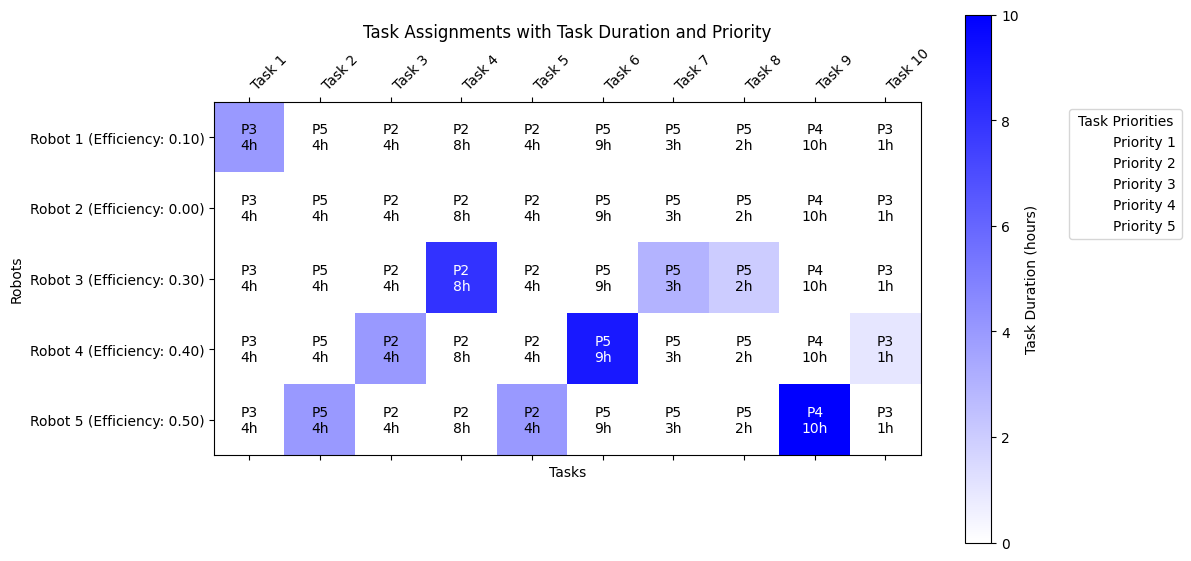

In [ ]:
# Main execution
if __name__ == "__main__":
    num_tasks = 10
    num_robots = 5
    task_durations, task_priorities, robot_efficiencies = generate_mock_data(num_tasks, num_robots)
    robot_efficiencies=np.array([0.1,0.0002,0.3,0.4,0.5])
    # Run GA to find the best solution
    best_solution = run_genetic_algorithm(task_durations, task_priorities, robot_efficiencies)
    print("Best Solution: ",best_solution,"\n\n")
    # Visualize the initial random assignment
    visualize_assignments_improved(best_solution, task_durations, task_priorities, robot_efficiencies)
